<a href="https://colab.research.google.com/github/ivng8/MobileGames-ML/blob/main/17KEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#Load Data Frame
app_storeDF = pd.read_csv('appstore_games.csv')
app_storeDF.head()

ParserError: Error tokenizing data. C error: EOF inside string starting at row 16273

In [ ]:
# Selecting the requested columns
selected_columns = app_storeDF[['ID', 'Name','User Rating Count', 'Price', 'In-app Purchases', 'Average User Rating', 'Age Rating',
                         'Languages', 'Size', 'Primary Genre', 'Original Release Date',
                         'Current Version Release Date']]

# Display the first few rows of the filtered dataframe
selected_columns.head()

NameError: name 'app_storeDF' is not defined

In [ ]:
# Check any null values in the dataset
missing_values = selected_columns.isnull().sum()
print(missing_values)

NameError: name 'selected_columns' is not defined

In [ ]:
# Drop all rows with null values
selected_columns = selected_columns.dropna()
missing_values_2 = selected_columns.isnull().sum()
print(missing_values_2)

NameError: name 'selected_columns' is not defined

In [ ]:
# Check data types of each column
print(selected_columns.dtypes)

NameError: name 'selected_columns' is not defined

In [ ]:
# Coerce a specific column into string type
selected_columns['In-app Purchases'] = selected_columns['In-app Purchases'].astype(str)
print(selected_columns.dtypes)

NameError: name 'selected_columns' is not defined

In [ ]:
# Convert the column from object type to a list of floats
# Function to convert in-app purchase string to a list of floats, handling missing values
def convert_in_app_purchases_to_list(x):
    if pd.isnull(x) or x == '':
        return []
    return [float(price) for price in x.split(', ')]

# Apply conversion to the 'In-app Purchases' column
selected_columns['In-app Purchases'] = selected_columns['In-app Purchases'].apply(convert_in_app_purchases_to_list)
print(selected_columns['In-app Purchases'])

NameError: name 'selected_columns' is not defined

In [ ]:
# Lambda functions
selected_columns['In-App-Q1'] = selected_columns['In-app Purchases'].apply(lambda x: 1 if any(price < 25 for price in x) else 0)
selected_columns['In-App-Q2'] = selected_columns['In-app Purchases'].apply(lambda x: 1 if any(25 <= price < 50 for price in x) else 0)
selected_columns['In-App-Q3'] = selected_columns['In-app Purchases'].apply(lambda x: 1 if any(50 <= price < 75 for price in x) else 0)
selected_columns['In-App-Q4'] = selected_columns['In-app Purchases'].apply(lambda x: 1 if any(75 <= price < 100 for price in x) else 0)

# Display the first few rows to verify the new columns, along with the 'In-app Purchases' list for comparison
selected_columns[['ID', 'Name', 'In-app Purchases', 'In-App-Q1', 'In-App-Q2', 'In-App-Q3', 'In-App-Q4']].head()

NameError: name 'selected_columns' is not defined

In [ ]:
# Find the row(s) with the highest 'In-App-Q1' value in the dataset
highest_in_app_q1 = selected_columns[selected_columns['In-App-Q1'] == selected_columns['In-App-Q1'].max()]


# Display the row(s) with the highest 'In-App-Q1' value
highest_in_app_q1[['ID', 'Name', 'In-app Purchases', 'In-App-Q1', 'In-App-Q2', 'In-App-Q3', 'In-App-Q4']].head()


NameError: name 'selected_columns' is not defined

NameError: name 'selected_columns' is not defined

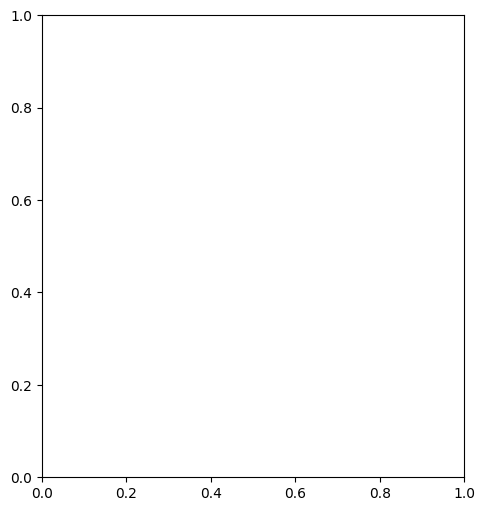

In [ ]:
# Histogram for "Average User Rating"
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(selected_columns['Average User Rating'].dropna(), bins=10, color='lightgreen')
plt.title('Histogram of Average User Rating')
plt.xlabel('Average User Rating')
plt.ylabel('Frequency')

# Histogram for "Price"
plt.subplot(1, 2, 2)
plt.hist(selected_columns['Price'].dropna(), bins=50, color='orange')
plt.title('Histogram of Price')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.yscale('log')

plt.tight_layout()
plt.show()